<a href="https://colab.research.google.com/github/manishgurungxon/MachineLearningPy/blob/main/LinearRegressionwithpython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#First we import neccesary libs for linear regression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

In [2]:
#Import csv files for dependent and independent variables
price_df = pd.read_csv("homeprices.csv")
area_df = pd.read_csv("areas.csv")


In [3]:
#Check if we have any scaling that is needed or misisng values
price_df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [4]:
area_df.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [5]:
%matplotlib inline

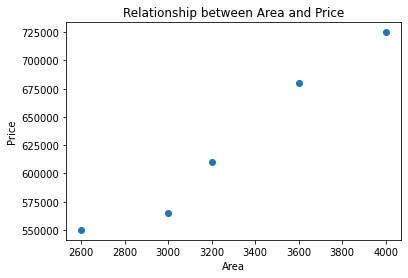

In [6]:
plt.scatter(price_df.area, price_df.price)
plt.title("Relationship between Area and Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [7]:
#Now create a new data frame by seperating dependent and independent variables from the dataset
new_df = price_df.drop("price", axis="columns")

In [8]:
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [9]:
#Lets create price column
price = price_df.price

In [10]:
#Now lets check if we have the prices
price


0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [18]:
#Use linear Regression from sklearn
from sklearn.linear_model import LinearRegression
#very important step when using linearregression
lin_reg = LinearRegression()
#Fitting the value to the model
lin_reg.fit(new_df,price)

LinearRegression()

In [20]:
print(lin_reg.coef_)
# This means that the price of the area is going to increase 135.787 from the example

[135.78767123]


In [23]:
#Choose independent value for prediction
lin_reg.predict([[3300]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([628715.75342466])

In [36]:
#now we are going to predict the new instances with our area.csv and area_df
predictions = lin_reg.predict(area_df)

In [37]:
predictions

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [41]:
area_df['housing_prices']=predictions

In [43]:
area_df

,area,housing_prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [44]:
area_df.to_csv(r'new_housing_prices', index=False)